In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# boston house dataset for the demo
from sklearn.datasets import load_boston
from feature_engine.outliers import Winsorizer

In [ ]:
! pip install feature_engine

In [ ]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]
boston['MEDV'] = boston_dataset.target
boston.head()

In [30]:
def find_Gaussian_boundaries(df, variable):
 
    lower_boundary = df[variable].mean()-3*df[variable].std() 
    upper_boundary = df[variable].mean()+3*df[variable].std() 

    return upper_boundary, lower_boundary

In [31]:
up_RM,lb_RM= find_Gaussian_boundaries(boston, 'RM')
up_LSTAT,lb_LSTAT=find_Gaussian_boundaries(boston, 'LSTAT')
up_CRIM,lb_CRIM=find_Gaussian_boundaries(boston, 'CRIM')

In [33]:
df_limit=boston.copy()

In [34]:
def cap_outlier(df,variable,upper_limit,lower_limit):
  df.loc[df_limit[variable]>upper_limit , variable] = upper_limit
  df.loc[df_limit[variable]<lower_limit , variable] = lower_limit
  return df

In [35]:
df_limit=cap_outlier(df_limit,'RM',up_RM,lb_RM)

In [36]:
df_limit=cap_outlier(df_limit,'LSTAT',up_LSTAT,lb_LSTAT)

In [37]:
df_limit=cap_outlier(df_limit,'CRIM',up_CRIM,lb_CRIM)

In [38]:
def doagnostic_plot(df,feature_name):
   # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature_name], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[feature_name], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature_name])
    plt.title('Boxplot')

    plt.show()

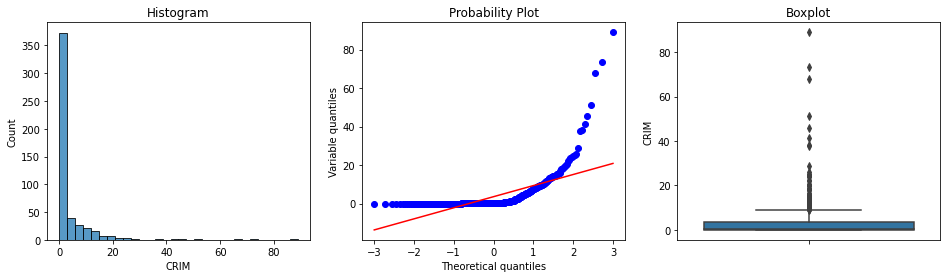

In [39]:
doagnostic_plot(boston, 'CRIM')

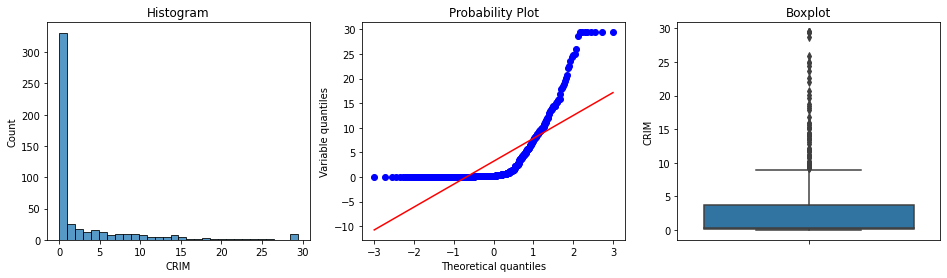

In [40]:
doagnostic_plot(df_limit, 'CRIM')

In [41]:
df_limit.skew()

RM       0.431115
LSTAT    0.861746
CRIM     2.561109
MEDV     1.108098
dtype: float64

In [20]:
boston.skew()

RM       0.403612
LSTAT    0.906460
CRIM     5.223149
MEDV     1.108098
dtype: float64

In [21]:
windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [22]:
boston_t=windsoriser.transform(boston)

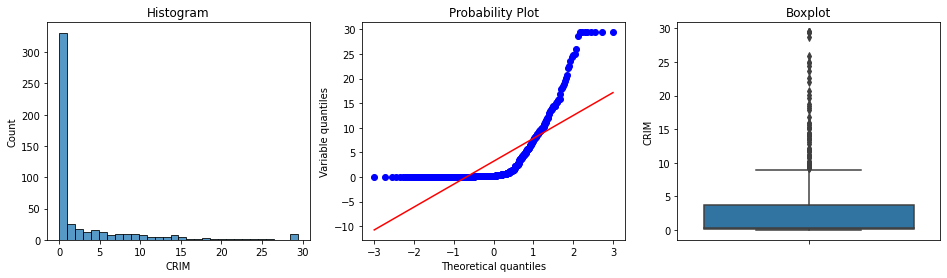

In [23]:
doagnostic_plot(boston_t, 'CRIM')

In [24]:
boston_t.skew()

RM       0.431115
LSTAT    0.861746
CRIM     2.561109
MEDV     1.108098
dtype: float64

In [25]:
boston.skew()

RM       0.403612
LSTAT    0.906460
CRIM     5.223149
MEDV     1.108098
dtype: float64

In [8]:
# create the capper

windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [9]:
boston_t = windsoriser.transform(boston)